# Student name : Daniyarova Altynshash BDA-1904 Group
# Industrial Practice
## Practical task for BDA students
## Task Description

Select a data set (kaggle or any other that you are interested in) and analyze 
it in the chosen direction. Build a neural network, train it according to the set data, also analyze its results and draw graphs based on the data (determine the graphs that are best suited for presentation to the customer).

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("Loans.csv")
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annualincome
0,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,45000
1,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,60000
2,1,credit_card,0.1343,678.08,11.884489,10.15,682,4209.958333,41674,74.1,0,0,0,1,145000
3,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,4485,36.9,1,0,0,1,33990
4,1,small_business,0.1501,225.37,12.269047,6.45,677,6240.000000,56411,75.3,0,0,0,1,213000


<h4>Variables in the dataset</h4>

<h5>Dependent Variable</h5>

<b>not.fully.paid</b>: A binary variable. 1 means borrower defaulted and 0 means monthly payments are made on time

<h5>Independent Variables</h5>

<b>credit.policy</b>: 1 if borrower meets credit underwriting criteria and 0 otherwise<br />
<b>purpose</b>: The reason for the loan<br />
<b>int.rate</b>: Interest rate for the loan (14% is stored as 0.14)<br />
<b>installment</b>: Monthly payment to be made for the loan<br />
<b>log.annual.inc</b>: Natural log of self reported annual income of the borrower<br />
<b>dti</b>: Debt to Income ratio of the borrower<br />
<b>fico</b>: FICO credit score of the borrower<br />
<b>days.with.cr.line</b>: Number of days borrower has had credit line<br />
<b>revol.bal</b>: The borrower's rovolving balance (Principal loan amount still remaining)<bv />
<b>revol.util</b>: Amount of credit line utilized by borrower as percentage of total available credit<br />
<b>inq.last.6mths</b>: Borrowers credit inquiry in last 6 months<br />
<b>delinq.2yrs</b>: Number of times borrower was deliquent in last 2 years<br />
<b>pub.rec</b>: Number of derogatory pulic record borrower has (Bankruptcy, tax liens and judgements etc.)<br />
<b>annualincome</b>: Annual income of borrpwer<br />

In [16]:
#rename column names, i.e. replace '.' by '_'
data.columns = data.columns.str.replace('.', '_')
data

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,annualincome
0,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,45000
1,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,60000
2,1,credit_card,0.1343,678.08,11.884489,10.15,682,4209.958333,41674,74.1,0,0,0,1,145000
3,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,4485,36.9,1,0,0,1,33990
4,1,small_business,0.1501,225.37,12.269047,6.45,677,6240.000000,56411,75.3,0,0,0,1,213000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,debt_consolidation,0.1095,323.87,10.571317,14.65,727,2399.958333,10299,39.9,0,0,0,0,39000
4996,1,debt_consolidation,0.1411,136.92,11.156193,2.43,682,1110.000000,4177,41.4,2,0,0,0,69996
4997,1,debt_consolidation,0.1189,198.99,10.778956,23.55,712,1890.000000,4659,41.6,0,0,0,0,48000
4998,1,all_other,0.1095,196.29,11.127322,21.33,717,5639.958333,27411,42.4,2,0,0,0,68004


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      5000 non-null   int64  
 1   purpose            5000 non-null   object 
 2   int_rate           5000 non-null   float64
 3   installment        5000 non-null   float64
 4   log_annual_inc     5000 non-null   float64
 5   dti                5000 non-null   float64
 6   fico               5000 non-null   int64  
 7   days_with_cr_line  5000 non-null   float64
 8   revol_bal          5000 non-null   int64  
 9   revol_util         5000 non-null   float64
 10  inq_last_6mths     5000 non-null   int64  
 11  delinq_2yrs        5000 non-null   int64  
 12  pub_rec            5000 non-null   int64  
 13  not_fully_paid     5000 non-null   int64  
 14  annualincome       5000 non-null   int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 586.1+ KB


In [18]:
data.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,annualincome
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.0000,5000.00000,5000.000000,5000.000000,5.000000e+03
mean,0.896200,0.120816,308.325968,10.911819,12.308698,710.926000,4510.713433,1.587253e+04,46.395622,1.4068,0.16140,0.066800,0.306600,6.626021e+04
std,0.305031,0.025336,197.307080,0.598897,6.754521,37.026757,2418.553606,3.111632e+04,29.138604,1.9897,0.49699,0.257587,0.461128,5.686419e+04
min,0.000000,0.060000,15.690000,7.600902,0.000000,617.000000,180.041667,0.000000e+00,0.000000,0.0000,0.00000,0.000000,0.000000,2.000000e+03
25%,1.000000,0.100800,163.550000,10.545341,7.067500,682.000000,2790.041667,3.328500e+03,22.300000,0.0000,0.00000,0.000000,0.000000,3.800000e+04
50%,1.000000,0.121800,260.640000,10.915088,12.300000,707.000000,4080.000000,8.605000e+03,45.700000,1.0000,0.00000,0.000000,0.000000,5.500000e+04
75%,1.000000,0.137900,407.510000,11.277203,17.652500,737.000000,5640.281250,1.815525e+04,70.500000,2.0000,0.00000,0.000000,1.000000,7.900000e+04
max,1.000000,0.216400,926.830000,14.528354,29.960000,827.000000,16259.041670,1.207359e+06,106.500000,33.0000,6.00000,3.000000,1.000000,2.039784e+06


Text(0.5, 0, 'FICO')

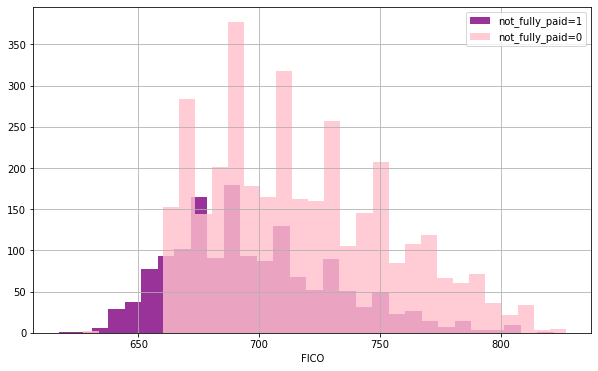

In [19]:
plt.figure(figsize=(10,6))
data[data['not_fully_paid']==1]['fico'].hist(bins=30, alpha=0.8, color='purple', label='not_fully_paid=1')
data[data['not_fully_paid']==0]['fico'].hist(bins=30, alpha=0.8, color='pink', label='not_fully_paid=0')
plt.legend()
plt.xlabel('FICO')

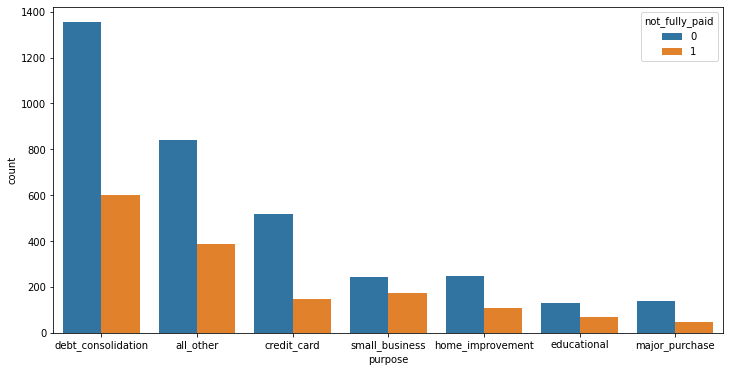

In [20]:
#creating a countplot to see the counts of purpose of loans by not_fully_paid
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='purpose', hue='not_fully_paid')

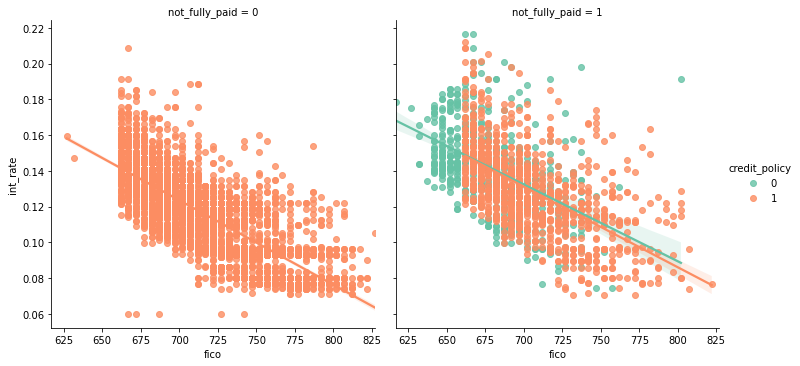

In [21]:
#understanding the relationship between credit_policy and not_fully_paid
sns.lmplot(data=data, x='fico', y='int_rate', hue='credit_policy', col='not_fully_paid', palette='Set2')

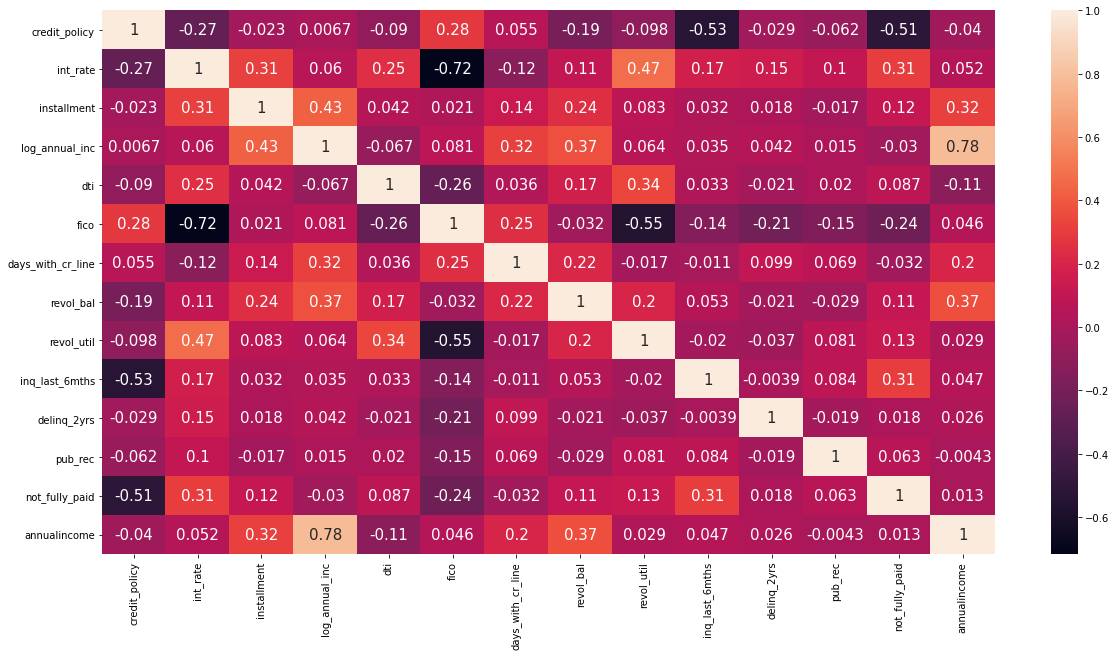

In [22]:
#Using sns library for making correlation 
corrMatrix = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corrMatrix, annot = True, annot_kws={'size':15})
plt.show()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      5000 non-null   int64  
 1   purpose            5000 non-null   object 
 2   int_rate           5000 non-null   float64
 3   installment        5000 non-null   float64
 4   log_annual_inc     5000 non-null   float64
 5   dti                5000 non-null   float64
 6   fico               5000 non-null   int64  
 7   days_with_cr_line  5000 non-null   float64
 8   revol_bal          5000 non-null   int64  
 9   revol_util         5000 non-null   float64
 10  inq_last_6mths     5000 non-null   int64  
 11  delinq_2yrs        5000 non-null   int64  
 12  pub_rec            5000 non-null   int64  
 13  not_fully_paid     5000 non-null   int64  
 14  annualincome       5000 non-null   int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 586.1+ KB


0    3467
1    1533
Name: not_fully_paid, dtype: int64


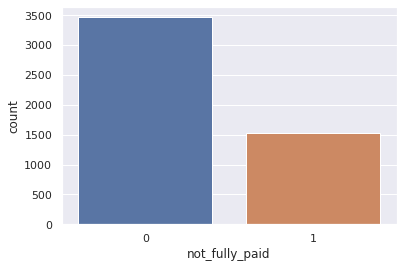

In percents: 
0    0.693
1    0.307
Name: not_fully_paid, dtype: float64


In [24]:
print(data['not_fully_paid'].value_counts())
sns.set(style='darkgrid')
sns.countplot(x = 'not_fully_paid',
              data = data,
              order = data['not_fully_paid'].value_counts().index)
plt.show()
print("In percents: ")
print(round(1. *data['not_fully_paid'].value_counts() / len(data['not_fully_paid']), 3))

In [27]:
print(data[data['not_fully_paid'] == 1].describe())

       credit_policy     int_rate  ...  not_fully_paid   annualincome
count    1533.000000  1533.000000  ...          1533.0    1533.000000
mean        0.661448     0.132452  ...             1.0   67360.671885
std         0.473372     0.025495  ...             0.0   59224.859089
min         0.000000     0.070500  ...             1.0    2000.000000
25%         0.000000     0.115400  ...             1.0   36000.000000
50%         1.000000     0.131600  ...             1.0   53000.000000
75%         1.000000     0.148200  ...             1.0   78955.000000
max         1.000000     0.216400  ...             1.0  700000.000000

[8 rows x 14 columns]


In [29]:
print(data[data['not_fully_paid'] == 0].describe())

       credit_policy     int_rate  ...  not_fully_paid  annualincome
count         3467.0  3467.000000  ...          3467.0  3.467000e+03
mean             1.0     0.115671  ...             0.0  6.577362e+04
std              0.0     0.023498  ...             0.0  5.579036e+04
min              1.0     0.060000  ...             0.0  4.200000e+03
25%              1.0     0.096300  ...             0.0  3.956000e+04
50%              1.0     0.116600  ...             0.0  5.500000e+04
75%              1.0     0.131600  ...             0.0  7.900000e+04
max              1.0     0.208600  ...             0.0  2.039784e+06

[8 rows x 14 columns]


In [31]:
print("Number of loans that have 50% credit utilization and defaulted: ")
print(len(data[(data['revol_util'] > 50.00) & (data['not_fully_paid'] == 1)]))
print("Number of loans that have 50% credit utilization and not defaulted: ")
print(len(data[(data['revol_util'] > 50.00) & (data['not_fully_paid'] == 0)]))

Number of loans that have 50% credit utilization and defaulted: 
837
Number of loans that have 50% credit utilization and not defaulted: 
1433


In [33]:
from sklearn import preprocessing
from scipy.stats import boxcox
from sklearn.preprocessing import OneHotEncoder

#Print unique values of purpose
print(pd.Series.unique(data['purpose']))
# Convert purpose to category
data['purpose'] = data['purpose'].astype('category')
#OneHotEcoding
data['purpose'] = pd.get_dummies(data['purpose'], prefix=['purpose'])

#extract dependent variable as label
Y = data['not_fully_paid']
#Drop dependent variable and categorical variable
X = data.drop('not_fully_paid', 1)

#scale dependent variable
X = preprocessing.scale(X)

#print first row of X
print(X[0])
print(X[0].mean(axis=0))
print(X[0].std(axis=0))

[0 1]
[ 0.34032684  0.57026784  1.13619619 -0.57938823 -0.32964068 -1.23021742
 -1.18644994 -0.55024824 -0.38676608  1.04354413 -0.70711203 -0.32478726
  3.62321686 -0.37391434]
0.07464483245582433
1.2081203728547312


In [34]:
#Shuffle and split data into 70% in training and 30% in testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("X_train size = {0}".format(len(X_train)))
print("Y_train size = {0}".format(len(Y_train)))
print("X_test size = {0}".format(len(X_test)))

X_train size = 3500
Y_train size = 3500
X_test size = 1500


In [36]:
# Scale both training and testing input data

X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

In [61]:
#Using Artificial Neural Network
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#Fit ANN model to data
startTrain = time.time()
classifier = Sequential()
classifier.add(Dense(activation="relu", kernel_initializer="uniform", units= 6, input_dim=14))
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(activation="relu", kernel_initializer="uniform", units=6)) 
classifier.add(Dense(activation="sigmoid", kernel_initializer="uniform", units=1))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(np.array(X_train), np.array(Y_train), batch_size=10, epochs=100)
endTrain = time.time()

print("ANN training time (secs): {0}".format(endTrain - startTrain))

#Predict using ANN
startTest = time.time()
Y_pred = classifier.predict_classes(np.array(X_test))
endTest = time.time()

print("ANN prediction time (secs): {0}".format(endTest - startTest))
print("ANN accuracy in testing set: {0}".format(metrics.accuracy_score(Y_test, Y_pred)))
print("ANN F1 score in testing set: {0}".format(metrics.f1_score(Y_test, Y_pred, average='micro')))



Epoch 1/100
350/350 [==============================] - 1s 1ms/step - loss: 0.6487 - accuracy: 0.6978
Epoch 2/100
350/350 [==============================] - 0s 1ms/step - loss: 0.5057 - accuracy: 0.7912
Epoch 3/100
350/350 [==============================] - 1s 1ms/step - loss: 0.4782 - accuracy: 0.7845
Epoch 4/100
350/350 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.7821
Epoch 5/100
350/350 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.7815
Epoch 6/100
350/350 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.7970
Epoch 7/100
350/350 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.7879
Epoch 8/100
350/350 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.8106
Epoch 9/100
350/350 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.8136
Epoch 10/100
350/350 [==============================] - 0s 1ms/step - loss: 0.4576 - accura

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ANN prediction time (secs): 0.23481965065002441
ANN accuracy in testing set: 0.786
ANN F1 score in testing set: 0.786
ANN Confusion Matrix: [[992  28]
 [293 187]]


In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

print("ANN Confusion Matrix: {0}".format(cm))

ANN Confusion Matrix: [[992  28]
 [293 187]]
